In [1]:
import numpy as np
import os
import scipy.io as io
from skimage.transform import resize, rotate
from scipy.optimize import linear_sum_assignment

In [2]:
#---------------------------- Load Wavelet data
wavelet_trackdata = io.loadmat("Wavelet_PCC.mat")
wavelet_data = wavelet_trackdata['saved_data'];

#---------------------------- Load Frequency data 
freqs_trackdata = io.loadmat("Wavelet_Frequences.mat")
freqs = freqs_trackdata['saved_data'];
freqs = freqs[0]


print("init shape:",wavelet_data.shape)
#---------------------------- Remove all out for [0,1] values (have to check this more) 
for i in range(0,wavelet_data.shape[0]):
    for j in range(0,wavelet_data.shape[1]):
        for k in range(0,wavelet_data.shape[2]):
            if(wavelet_data[i,j,k]>1):
                wavelet_data[i,j,k] = 0.99
            if(wavelet_data[i,j,k]<0):
                wavelet_data[i,j,k] = 0.01

init shape: (349, 80, 1000)


resized shape: (349, 60, 100)


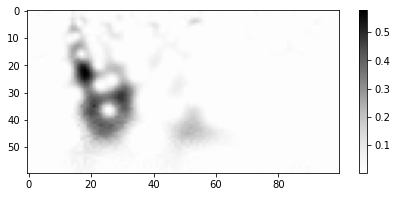

In [3]:
#---------------------------- Resize Image
from cv2 import *
import os

def resizeImg(image, width=None, height=None):
    dim=None
    (h,w) = image.shape[:2]
    if width is None and height is None:
        return image

    elif width is not None and height is not None:
        dim = (width, height)
  
    elif width is None:
        r = height/float(h)
        dim = (int(w*r), height)
    else:
        r = width / float(w)
        dim = (width, int(h*r))
    resized = resize(image, dim)
    return resized

resized_wavelet_data = []
for img in wavelet_data:
    resized_wavelet_data.append(resizeImg(img,100,60))
wavelet_data = np.array(resized_wavelet_data)
print("resized shape:",wavelet_data.shape)

#---------------------------- Plot Images
import matplotlib.pyplot as plt

def Plot_CWT_Small(array):
    plt.figure(1, figsize=(7,3))
    plt.imshow(array, cmap='Greys', aspect='auto')
    plt.colorbar()
    plt.show()
    
Plot_CWT_Small(wavelet_data[12])

target_shape: (349, 60, 100)
img shape: (60, 100)
from y: 60 -> to y 53 from x: 100 -> to x: 93


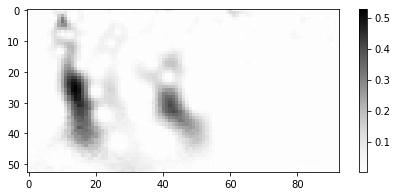

new image shape (croped): (53, 93)
new image shape (resized): (60, 100)


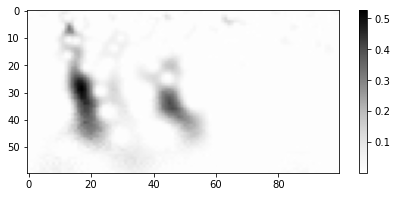

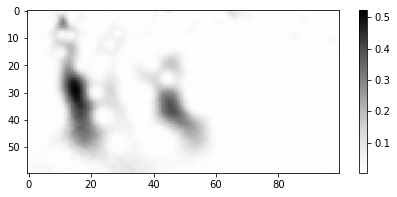

In [4]:
def random_crop(image, target_shape, crop_sizes): # Perform random crop, resize back to its target shape
    height, width = image.shape[0], image.shape[1]
    crop_size_idx = np.random.randint(0, len(crop_sizes))
    d = crop_sizes[crop_size_idx]
    x = width - d
    y = height - d
    print("from y:",height,"-> to y",y,"from x:",width,"-> to x:",x)
    center = np.random.randint(0, 2)
    if center:
        dx = dy = d // 2
    else:
        dx = np.random.randint(0, d + 1)
        dy = np.random.randint(0, d + 1)
    image = image[dy:(y + dy),dx:(x + dx)]
    Plot_CWT_Small(image)
    print("new image shape (croped):",image.shape)
    image=resizeImg(image, width,height)
    print("new image shape (resized):",image.shape)
    return image
    

target_shape = wavelet_data.shape
print("target_shape:",target_shape)
img = wavelet_data[51]
print("img shape:",img.shape)
crop_sizes = [5 + i for i in range(0,5,2)]
imag_bar = random_crop(img,target_shape[1:],crop_sizes)
Plot_CWT_Small(img)
Plot_CWT_Small(imag_bar)

init data shape: (349, 60, 100)
input_shape: [60, 100, 1]
new_shape: [-1, 60, 100, 1]
new data shape: (349, 60, 100, 1)
(60, 100, 1)


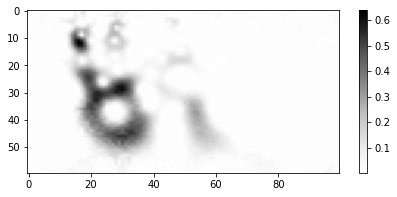

(60, 100, 1)


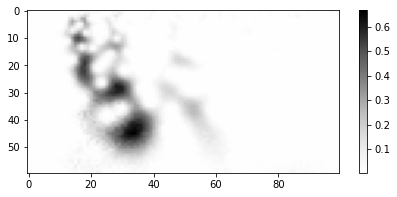

In [6]:
data = wavelet_data
n_channels = 1
input_shape = [data.shape[1], data.shape[2], n_channels]
n_labels = 10
indexes = [i for i in range(data.shape[0])]
print("init data shape:",data.shape)
print("input_shape:",input_shape)

# reshape and normalize input images
new_shape = [-1, data.shape[1], data.shape[2], n_channels]
print("new_shape:",new_shape)
data = np.reshape(data, new_shape)
data = data.astype('float32')  
print("new data shape:",data.shape)

for item in data[0:2]:
    print(item.shape)
    Plot_CWT_Small(item)

In [13]:
start_index=0
end_index=2
x = data[indexes[start_index : end_index]] # Given an array of images.  the start index to retrieve a batch, the end index to retrieve a batch
print("x_shape:",x.shape)
target_shape = (x.shape[0], *input_shape)
print("target_shape:",target_shape)
x1 = np.zeros(target_shape)
x2 = np.zeros(target_shape)
print("x1 shape",x1.shape)

x_shape: (2, 60, 100, 1)
target_shape: (2, 60, 100, 1)
x1 shape (2, 60, 100, 1)


original image shape: (60, 100, 1)


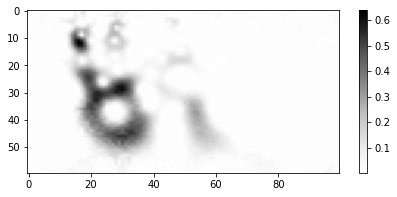

--from y: 60 -> to y 45 from x: 100 -> to x: 85
--new image shape (croped): (45, 85, 1)
width,height 100 60
--new image shape (resized): (60, 100)
image_bar (60, 100)
croped image shape (60, 100, 1)


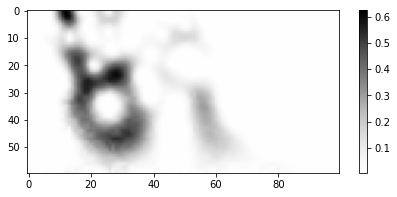

final x1: (2, 60, 100, 1)
final x2: (2, 60, 100, 1)
original image shape: (60, 100, 1)


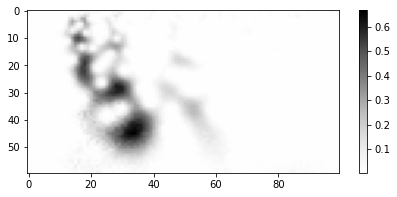

--from y: 60 -> to y 45 from x: 100 -> to x: 85
--new image shape (croped): (45, 85, 1)
width,height 100 60
--new image shape (resized): (60, 100)
image_bar (60, 100)
croped image shape (60, 100, 1)


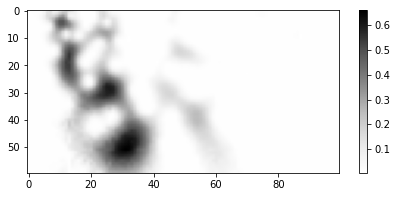

final x1: (2, 60, 100, 1)
final x2: (2, 60, 100, 1)


In [23]:
def resizeImg(image, width=None, height=None):
    dim=None
    (h,w) = image.shape[:2]
    if width is None and height is None:
        return image
    elif width is not None and height is not None:
        dim = (width, height)
    elif width is None:
        r = height/float(h)
        dim = (int(w*r), height)
    else:
        r = width / float(w)
        dim = (width, int(h*r))
    resized = resize(image, dim)
    return resized
                     
def random_crop(image, crop_sizes): # Perform random crop, resize back to its target shape
    height, width, z = image.shape[0], image.shape[1], image.shape[2]
    crop_size_idx = np.random.randint(0, len(crop_sizes))
    d = crop_sizes[crop_size_idx]
    x = width - d
    y = height - d
    print("--from y:",height,"-> to y",y,"from x:",width,"-> to x:",x)
    center = np.random.randint(0, 2)
    if center:
        dx = dy = d // 2
    else:
        dx = np.random.randint(0, d + 1)
        dy = np.random.randint(0, d + 1)
    image = image[dy:(y + dy),dx:(x + dx)]
    print("--new image shape (croped):",image.shape)
    print("width,height",width,height)
    image=resizeImg(image, width,height)
    print("--new image shape (resized):",image.shape)
    return image

for i in range(x.shape[0]):
    image = x[i]
    print("original image shape:",image.shape)
    Plot_CWT_Small(image)
    crop_sizes = [15 + i for i in range(0,5,2)]
    image_bar = random_crop(image,crop_sizes)
    print("image_bar",image_bar.shape)
    
    image_bar_shape = [image_bar.shape[0], image_bar.shape[1], 1]
    image_bar = np.reshape(image_bar, image_bar_shape)
    print("croped image shape",image_bar.shape)
    Plot_CWT_Small(image_bar)
    x1[i] = image
    x2[i] = image_bar
    print("final x1:",x1.shape)
    print("final x2:",x2.shape)
x_train = np.concatenate([x1, x2], axis=0) # for IIC, we are mostly interested in paired images X and Xbar = G(X)

